#1.모듈및 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/sampleSubmission.csv')

#2.데이터 둘러보기

In [4]:
# 데이터 크기 확인하기

train.shape,test.shape

((10886, 12), (6493, 9))

In [5]:
# 데이터 상위 5개 보기

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [8]:
# info

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


#3.더 효과적인 분석을 위한 피처 엔지니어링

In [10]:
train['datetime'][100]

'2011-01-05 09:00:00'

In [11]:
# 새로운 피쳐로 각각 만들기

train['date'] = train['datetime'].apply(lambda x : x.split()[0])
train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])


In [12]:
# 요일 만들기

from datetime import datetime
import calendar

# 날짜

print(train['date'][100])

# datetime 타입으로 변경

print(datetime.strptime(train['date'][100], '%Y-%m-%d'))

# 정수로 요일 반환

print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())

# 문자열로 요일 반환

print(calendar.day_name[datetime.strptime(train['date'][100],'%Y-%m-%d').weekday()])             # 머신러닝은 숫자만 취급하기 떄문에 숫자로나타내야 하지만 보기쉬우라고 문자열로 나타냄

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
train['weekday'] = train['date'].apply( lambda dateString: calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()])

In [14]:
# 'season' 과 'weather' 시각화시 의미가 잘 나타나게 문자열로 바꾸기

train['season']= train['season'].map({1: 'Spring',
                                      2: 'Summer',
                                      3: 'Fall',
                                      4: 'Winter'})

train['weather']= train['weather'].map({1: 'Clear',
                                      2: 'Mist,Few clouds',
                                      3: 'Light Snow, Rain, Thunderstorm',
                                      4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [16]:
# head를 본 결과 , 'date' 피쳐가 'year,month,day'로 세분화 되있어서 date 피처 제거
# 'season' 은 'month' 를 세개씩 묶으면 같은 의미를 가져 더 큰 분류로 묶으면 성능이 좋아지는 경우가 있어 ' month' 피쳐 제거

In [17]:
# train = train.drop(['date','month'],axis=1)

In [18]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


#4.데이터 시각화

In [19]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#  %matplotlib inline을 추가하면 주피터 노트북에서 matplotlib이 그린 그래프를 바로 출력 가능

###1.분포도

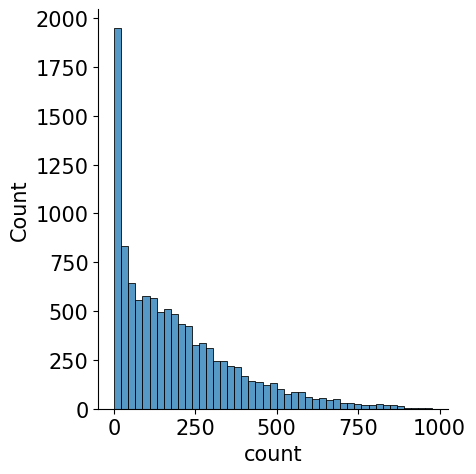

In [20]:
# 타깃값인 count의 분포도 그려보기

mpl.rc('font', size = 15)           # 폰트 크기를 15로 설정
sns.displot(train['count'])

In [21]:
# count(타깃값)에 대한 분포도를 그려본 결과 : 0에 너무 치우쳐 있다. 즉 , 분포가 왼쪽으로 치우쳐 있다
# 회귀 모델이 좋은 성능을 보이려면 정규분포에 가까워야함. 그래서 현재 타깃값을 그대로 모델링 하면 좋은결과 기대하기 어렵다
# 데이터 분포를 정규분포에 가깝게 만들기 위해 가장 많이 사용하는 방법은 로그변환(로그변환은 데이터가 왼쪽으로 편향되어 있을때 사용)

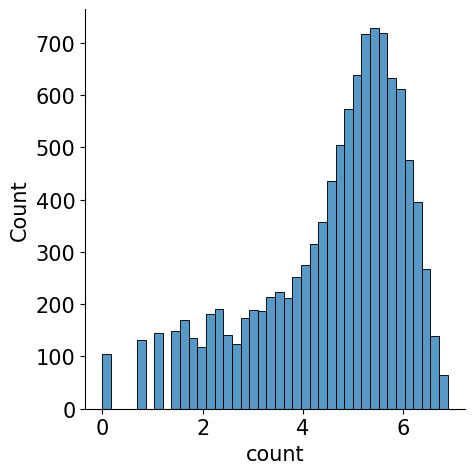

In [22]:
sns.displot(np.log(train['count']))

In [23]:
# 피처를 바로 활용해 count를 사용하는 것 보다 log(count)를 예측하는 편이 더 정확
# 따라서 우리는 타깃값을 log(count)로 변환해 사용할 꺼임

In [24]:
# 다만 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야함

###2.막대그래프

In [25]:
# 연도, 월,일,시,분,초별로 총 6가지의 평균 대여 수량을 막대 그래프로 그려보겠다
# 각 범주형 데이터에 따라 '평균' 대여 수량이 어떻게 다른지 파악하려 함
# 그래야 어떤 피처가 중요한지 알 수 있음
# 이럴때 막대그래프 사용

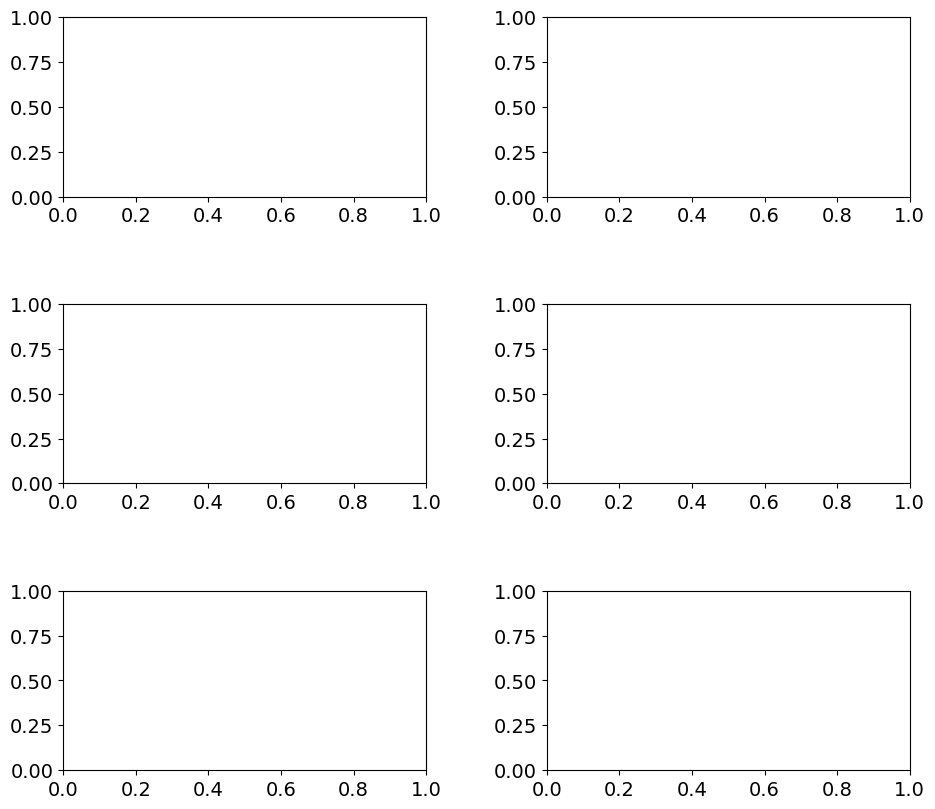

In [26]:
# 스텝 1. m행 n열 figure 준비하기

mpl.rc('font',size = 14)         # 폰트 크기 설정
mpl.rc('axes', titlesize = 15)   # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 3, ncols = 2)      # 3행 2열 figure 생성
plt.tight_layout()              # 그래프 사이에 여백 확보
figure.set_size_inches(10,9)    # 전체 figure 크기를 10X9로 설정

In [27]:
# 스텝 2. 각 축에 서프플롯 할당

sns.barplot (x= 'year', y= 'count', data= train, ax= axes[0,0])
sns.barplot (x= 'month', y= 'count', data= train, ax= axes[0,1])
sns.barplot (x= 'day', y= 'count', data= train, ax= axes[1,0])
sns.barplot (x= 'hour', y= 'count', data= train, ax= axes[1,1])
sns.barplot (x= 'minute', y= 'count', data= train, ax= axes[2,0])
sns.barplot (x= 'second', y= 'count', data= train, ax= axes[2,1])

<Axes: xlabel='second', ylabel='count'>

In [28]:
# 스텝 3. 세부 설정(선택사항)

axes[0,0].set(title= 'Rental amounts by year')
axes[0,1].set(title= 'Rental amounts by month')
axes[1,0].set(title= 'Rental amounts by day')
axes[1,1].set(title= 'Rental amounts by hour')
axes[2,0].set(title= 'Rental amounts by minute')
axes[2,1].set(title= 'Rental amounts by second')

[Text(0.5, 1.0, 'Rental amounts by second')]

[Text(0.5, 1.0, 'Rental amounts by second')]

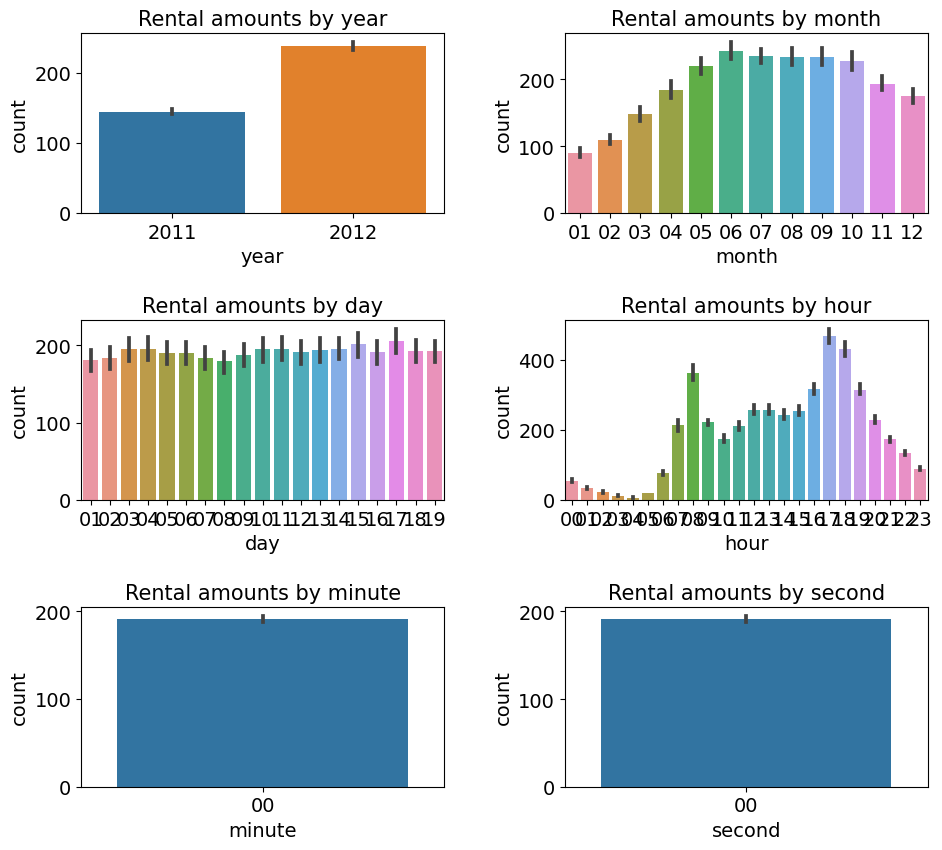

In [29]:
# 한번에 실행 시키기

mpl.rc('font',size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot (x= 'year', y= 'count', data= train, ax= axes[0,0])
sns.barplot (x= 'month', y= 'count', data= train, ax= axes[0,1])
sns.barplot (x= 'day', y= 'count', data= train, ax= axes[1,0])
sns.barplot (x= 'hour', y= 'count', data= train, ax= axes[1,1])
sns.barplot (x= 'minute', y= 'count', data= train, ax= axes[2,0])
sns.barplot (x= 'second', y= 'count', data= train, ax= axes[2,1])

axes[0,0].set(title= 'Rental amounts by year')
axes[0,1].set(title= 'Rental amounts by month')
axes[1,0].set(title= 'Rental amounts by day')
axes[1,1].set(title= 'Rental amounts by hour')
axes[2,0].set(title= 'Rental amounts by minute')
axes[2,1].set(title= 'Rental amounts by second')

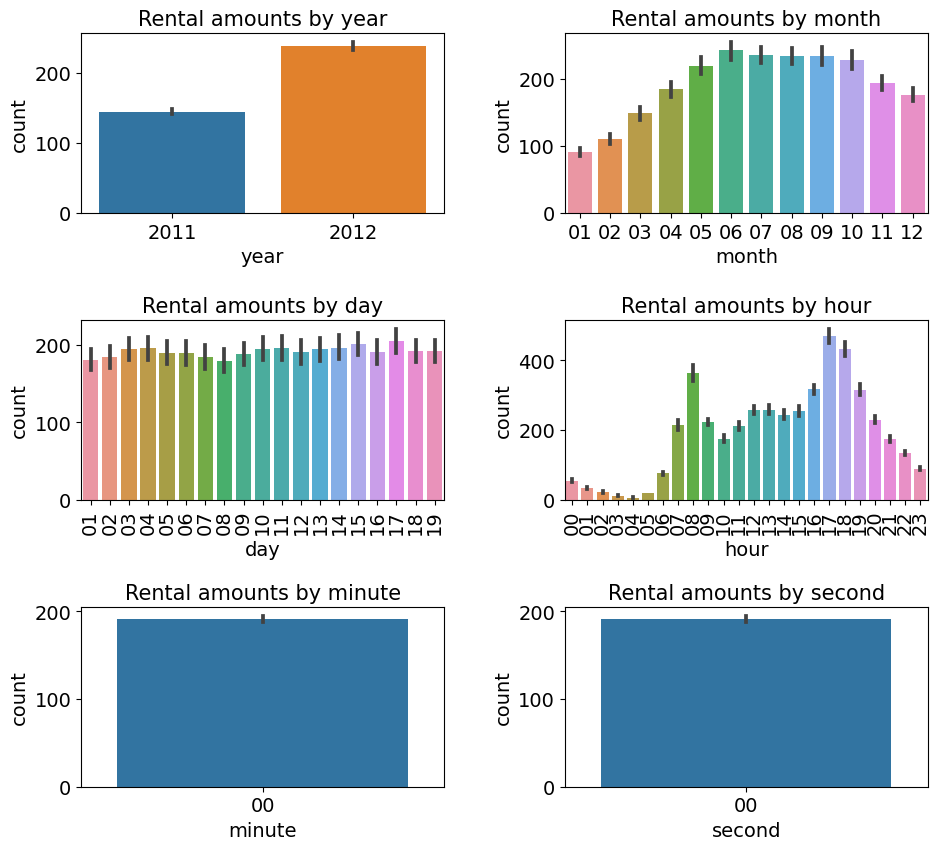

In [30]:
# 1 행에 위치한 서브플롯들의 x축 라벨 90도 회전

mpl.rc('font',size = 14)
mpl.rc('axes', titlesize = 15)
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot (x= 'year', y= 'count', data= train, ax= axes[0,0])
sns.barplot (x= 'month', y= 'count', data= train, ax= axes[0,1])
sns.barplot (x= 'day', y= 'count', data= train, ax= axes[1,0])
sns.barplot (x= 'hour', y= 'count', data= train, ax= axes[1,1])
sns.barplot (x= 'minute', y= 'count', data= train, ax= axes[2,0])
sns.barplot (x= 'second', y= 'count', data= train, ax= axes[2,1])

axes[0,0].set(title= 'Rental amounts by year')
axes[0,1].set(title= 'Rental amounts by month')
axes[1,0].set(title= 'Rental amounts by day')
axes[1,1].set(title= 'Rental amounts by hour')
axes[2,0].set(title= 'Rental amounts by minute')
axes[2,1].set(title= 'Rental amounts by second')

axes[1,0].tick_params(axis= 'x', labelrotation=90)
axes[1,1].tick_params(axis= 'x', labelrotation=90)

In [31]:
# 결론 : day, minute, second 데이터가 의미 없다고 판단

###3.박스플롯

In [32]:
# 계절, 날씨, 공휴일, 근무일(범주형 데이터들) 별 대여수량(수치형 데이터)(타깃값)을 박스플롯으로 그려보겠다
# 각 범주형 데이터에 따라 타깃값인 대여수량이 어떻게 변화 하는지 알 수 있다

In [33]:
# 2행 2열  figure을 만들고 서브플롯 할당, 세부 설정 순으로 작성

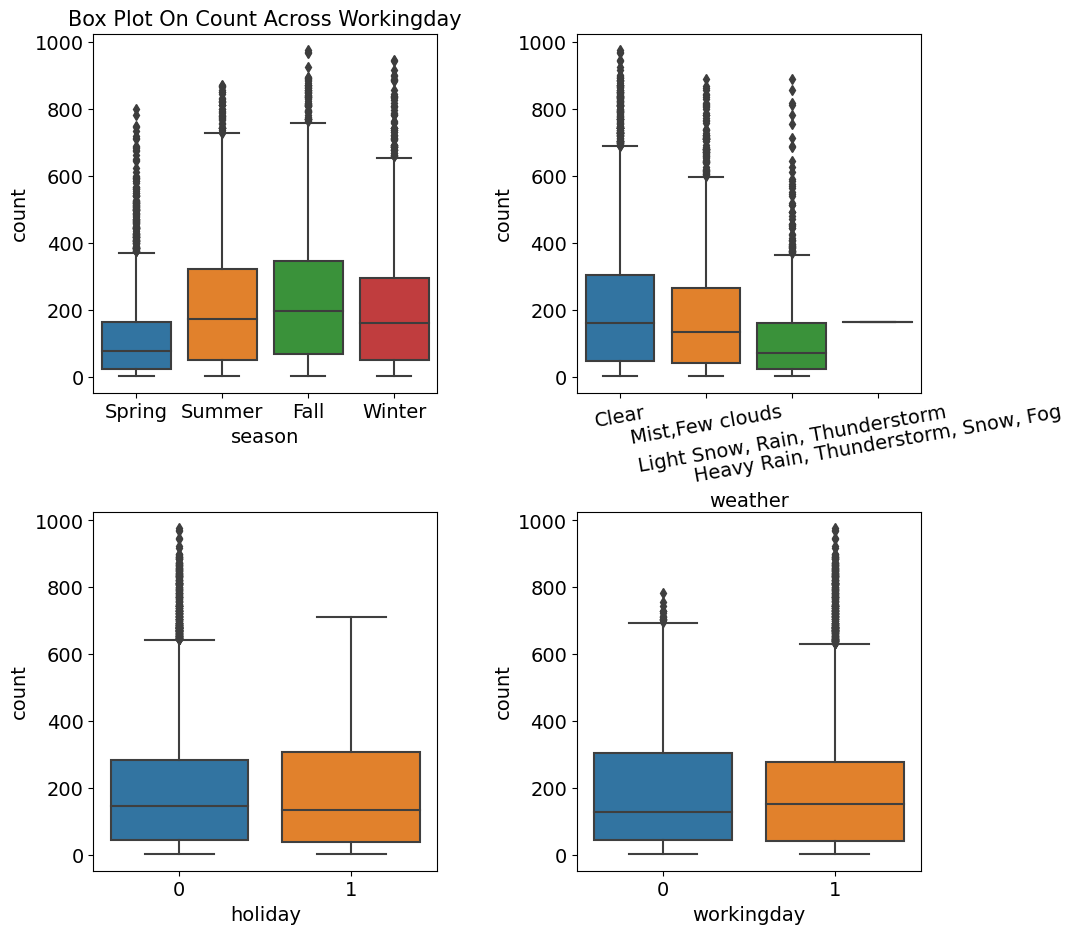

In [34]:
figure, axes = plt.subplots(nrows= 2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x= 'season', y= 'count', data= train, ax = axes[0,0])
sns.boxplot(x= 'weather', y= 'count', data= train, ax = axes[0,1])
sns.boxplot(x= 'holiday', y= 'count', data= train, ax = axes[1,0])
sns.boxplot(x= 'workingday', y= 'count', data= train, ax = axes[1,1])

axes[0,0].set(title= 'Box Plot On Count Across Season')
axes[0,0].set(title= 'Box Plot On Count Across Weather')
axes[0,0].set(title= 'Box Plot On Count Across Holiday')
axes[0,0].set(title= 'Box Plot On Count Across Workingday')

axes[0,1].tick_params(axis='x', labelrotation=10)

###4.포인트플롯

In [35]:
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 그려봄
# 포인트플롯은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시해줌
# 막대그래프와 같은 정보를 제공하지만 한 화면에 여러 그래프를 그려 서로 비교하기에 더 적합함

<Axes: xlabel='hour', ylabel='count'>

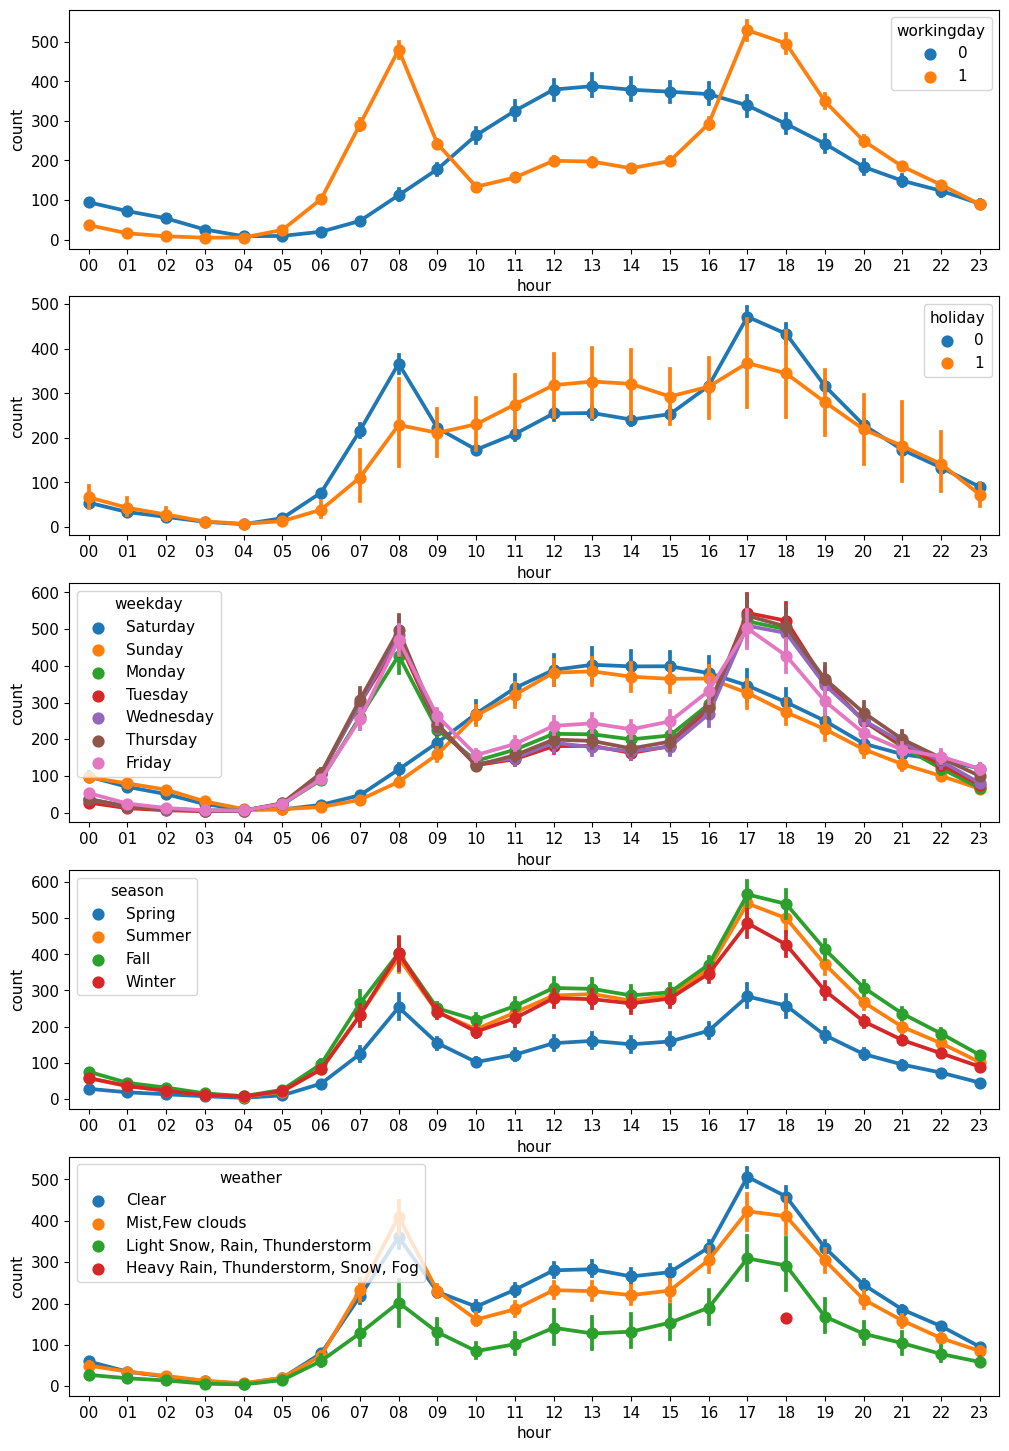

In [36]:
mpl.rc('font',size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12,18)

sns.pointplot(x= 'hour', y= 'count', data= train, hue= 'workingday', ax = axes[0])
sns.pointplot(x= 'hour', y= 'count', data= train, hue= 'holiday', ax = axes[1])
sns.pointplot(x= 'hour', y= 'count', data= train, hue= 'weekday', ax = axes[2])
sns.pointplot(x= 'hour', y= 'count', data= train, hue= 'season', ax = axes[3])
sns.pointplot(x= 'hour', y= 'count', data= train, hue= 'weather', ax = axes[4])

In [37]:
# 분석 결과 : weather ==4  인 데이터 제거

###5.회귀선을 포함한 산점도 그래프

In [38]:
# 온도, 체감 온도, 풍속, 습도별 대여수량(수치형 데이터)을 그려보겠음

In [39]:
# 회귀선을 포함한 산점도 그래프는 수치형 데이터 간 상관관계를 파악하는데 사용

<Axes: xlabel='humidity', ylabel='count'>

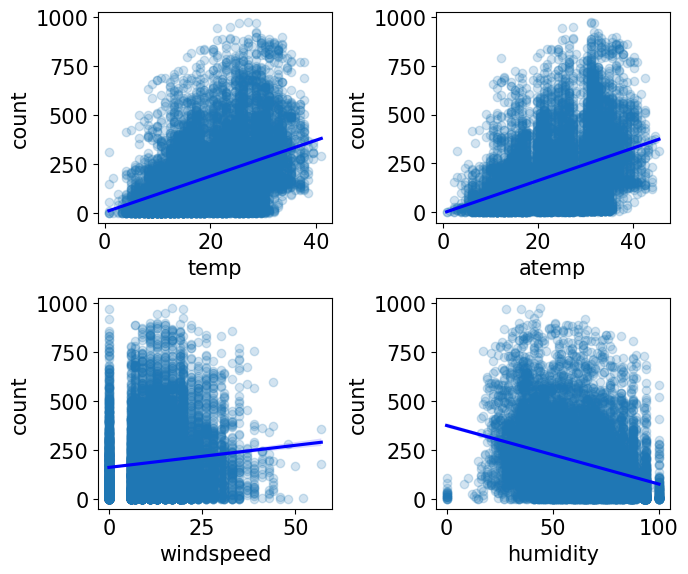

In [40]:
mpl.rc('font',size = 15)
figure, axes = plt.subplots(nrows = 2, ncols = 2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x= 'temp', y= 'count', data= train, ax = axes[0,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})                  # scatter_kws={'alpha':0.2} 는 산점도 그래피에 찍히는 점의 투명도 조절, 1이면 완전 불투명 0이면 투명하다는 말
sns.regplot(x= 'atemp', y= 'count', data= train, ax = axes[0,1],                   # line_kws={'color':'blue'} 는 회귀선의 색상
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x= 'windspeed', y= 'count', data= train, ax = axes[1,0],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})
sns.regplot(x= 'humidity', y= 'count', data= train, ax = axes[1,1],
            scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})

In [41]:
# 보통 바람 세기가 약하면 많이 빌리는데 3번 그래프를 보면 양의 상관관계를 가짐. 이유는 결측치가 많은데 다 0으로 처리해서 그런거 같음.
# 상관관계 파악하기 힘들어 windspeed 피처 삭제해야함

###6히트맵

In [42]:
# 수치형 데이터들 끼릭 어떤 상관관계가 있는지 알아보겠음

In [43]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [44]:
# 조합이 많아 관계에 대해 한눈에 들어오지 않아 히트맵 필요

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

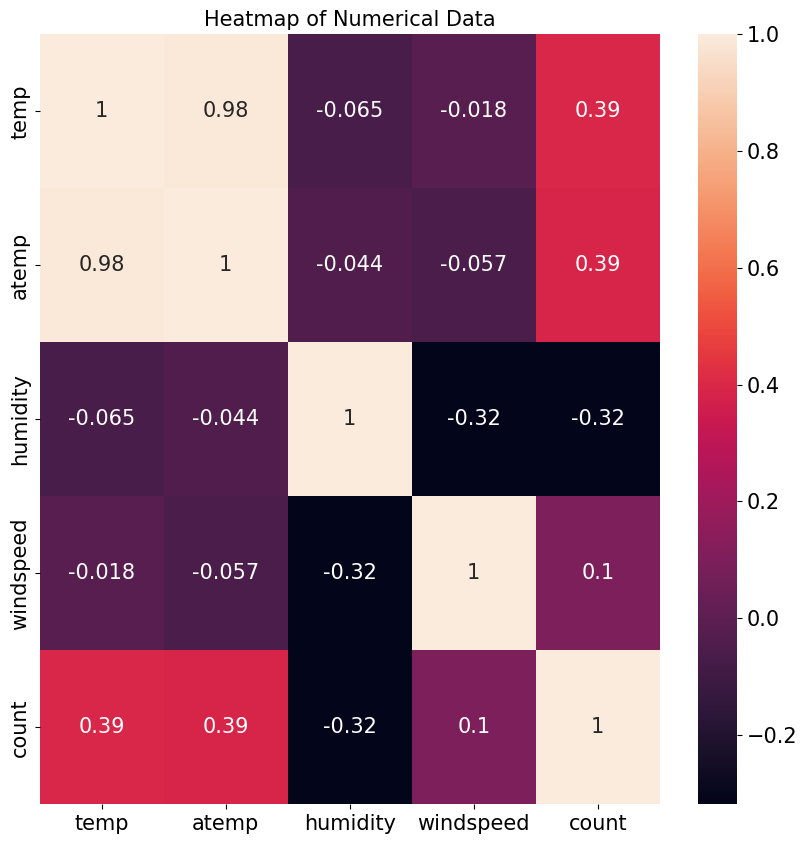

In [45]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)          # annot=True를 하면 히트맵안에 숫자를 나타내줌
ax.set(title='Heatmap of Numerical Data')

In [46]:
# 풍속과 대여 수량이 상관관계 0.1 로 상관관계가 매우 약함. 별 도움이 안됨.
# windspeed 피처 제거

#4.베이스라인모델

##4.1피처엔지니어링

In [47]:
# 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/자료/6장.자전거 대여 수요 예측/sampleSubmission.csv')

In [48]:
# 훈련 데이터에서 weather 가 4인 데이터를 제거하기로 했었음

train = train[train['weather']!=4]

###4.1.1.데이터 합치기

In [49]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [50]:
# 인덱스 주목
all_data = pd.concat([train, test], ignore_index= True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


###4.1.2.파생 피처(변수) 추가

In [51]:
from datetime import datetime

# 날짜, 연도, 월, 시, 요일 피처 생성하기
# day , minute, second 는 앞 분석에서 필요없다고 판단되어 만들지 않음
all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[1])
all_data['day'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[2])
all_data['hour'] = all_data['datetime'].apply(lambda x : x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

###4.1.3.필요 없는 피처 제거

In [52]:
# 필요 없는 피처 제거
drop_features = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

###4.1.4.데이터 나누기

In [53]:
# 훈련,테스트 데이터로 나누기

X_train = all_data[~pd.isnull(all_data['count'])]               # count 피처를 null 로 표현하지 마라
X_test = all_data[pd.isnull(all_data['count'])]                 # count 피처를 null 로 표현하라

In [54]:
# 타깃값 count 제거하기

X_train = X_train.drop(['count'], axis= 1)
X_test = X_test.drop(['count'], axis= 1)

# 타깃값

y = train['count']

##4.2평가지표 계산 함수 작성

In [55]:
import numpy as np

def rmsle(y_true, y_pred, convertExp = True):
  # 지수 변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)                  # 지수변환 하는이유 : 지금 타깃값으로 log를 씌어 놔서 다시 돌리기 위해

  # 로그 변환 후 결측값을 0으로 변환하기

  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  # RMSLE 계산

  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

##4.3모델훈련

In [56]:
# 사이킷런이 제공하는 가장 간단한 선형 회귀 모델 LinearRegression 임포트

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [57]:
# 훈련시키기

log_y = np.log(y)          # 티깃값 로그변환
linear_reg_model.fit(X_train, log_y)        # 모델 훈련

LinearRegression()

##4.4모델 성능 검증

In [58]:
# 타깃값을 예측하는데 다시 훈련데이터를 원래는 사용하지 않는데 어떻게 구현되는지 보기위해 쓴거라 가볍게 참고
# 다음 장 부터 올바른 검증 방법 배울 것이다

In [59]:
preds = linear_reg_model.predict(X_train)

In [60]:
# 예측 결과로 부터 훈련이 얼마나 잘됬는지 확인

print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0203


##4.5예측 및 결과 제출

In [61]:
# 테스트 데이터로 예측

linearreg_preds = linear_reg_model.predict(X_test)

# 지수변환

submission['count'] = np.exp(linearreg_preds)

# 파일 저장

submission.to_csv('submission.csv', index = False)          # index = False를 해야 데이터프레임 인덱스를 제외하고 저장함

In [62]:
# 끝 ! - 성능이 별로 않좋읍

In [63]:
# 더 좋은 회귀 모델을 만들어 내기위해 세가지 (릿지, 라쏘, 랜덤포레스트) 를 순대로 해보겠음

#5.성능 개선 1: 릿지 회귀 모델

In [64]:
# L2 규제를 적용한 회귀모델
# 규제란 : 모델이 훈련데이터에 과대적합되지 않도록 해주는 방법
# 성능이 좋은 편은 아니다. 단순 선형 회구모델 보다 과대적합이 적은 모델 정도로 생각하면 됨

In [65]:
# 4-1 , 4-2 실행후 진행(데이터 불러오기, 피처엔지니어링, 평가지표 계산 함수 작성)

##5.1하이퍼파라미터 최적화(모델 훈련)

###5.1.1모델 생성

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

###5.1.2그리드서치 객체 생성

In [67]:
# 그리드서치는 하이퍼파라미티의 값을 바꿔가며 모델의 성능을 교차 검증으로 평가해 최적의 하이퍼파라미터 값을 찾아줌
# 이말은 그리드서치 객체가 다음 세 가지를 알고 있어야 한다는 뜻임

In [68]:
#1. 비교 검증해볼 하이퍼파라미터 값 목록
#2. 대상 모델              -   만들어 져 있음
#3. 교차 검증용 평가 수단(평가 함수)

In [69]:
# 하이퍼파라미터 값 목록

ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800,900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)     # metrics.make_scorer는 평가지표 계산 함수와 평가지표 점수가 높은지 좋은지 여부 등을 인수로 받는 교차검증용 평가 함수

In [70]:
# 그리드서치(with 릿지) 객체 생성

gridsearch_ridge_model = GridSearchCV(estimator = ridge_model,        # 릿지 모델
                                      param_grid = ridge_params,      # 값 목록
                                      scoring = rmsle_scorer,         # 평가 지표
                                      cv=5)                           # 교차 검증 분할 수

In [71]:
# estimator   : 분류 및 회귀 모델
# param_grid  : 딕셔너리 형태로 모델의 하이퍼파라미터의 명과 값을 지정해줌
# scoring     : 평가지표, 사이킷런에서 기본적으로 평가지표 문자열 형태로 제공.
# cv          : 교차 검증 분할 개수 (기본값 5)

###5.1.3그리드서치 수행

In [72]:
log_y = np.log(y)    # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y)      # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [73]:
# 가장 좋은 성능을 보인 값을 best_params 속성에 저장
# 이 최적 값으로 훈련된 모델(최적예측기)을 best_estimator_ 속성에 저장

In [74]:
print('최적 하이퍼파라미터: ',gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터:  {'alpha': 0.1, 'max_iter': 3000}


In [75]:
# 출력결과 최적 하이퍼파라미터 :  {'alpha': 0.1, 'max_iter': 3000}

##5.2성능 검증

In [76]:
# 예측

preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가

print(f'릿지 회귀 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값: 1.0203


In [77]:
# 앞에서 했던 선형 회귀 모델과 겨과가 다르지 않음.
# 굳이 제출하지 않음

#6.성능 개선2 : 라쏘 회귀 모델

In [78]:
# L1 규제를 적용한 선형 회귀 모델임
# 릿지와 마찬가지로 성능이 좋은 편은 아님
# 다시 말하자면 우리가 직접 만드는 모델은 적어도 릿지와 라쏘보다는 성능이 좋아야 할 것임

##6.1 하이퍼파라미터 최적화(모델 훈련)

In [79]:
##6.1 하이퍼파라미터 최적화(모델 훈련)

In [80]:
# rmsle_scorer 함수는 릿지 회귀 때 정의한 것을 재활용 함
# 릿지회귀와 마찬가지로 알파는 규제 강도를 조정하는 파라미터

In [81]:
from sklearn.linear_model import Lasso

# 모델 생성

lasso_model = Lasso()

# 하이퍼파라미터 값 목록

lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800,900, 1000])
lasso_params = {"max_iter": [3000], "alpha": lasso_alpha}

# 그리드서치 객체(with 라쏘) 생성

gridsearch_lasso_model = GridSearchCV(estimator = lasso_model,
                                      param_grid = lasso_params,
                                      scoring = rmsle_scorer,
                                      cv = 5)

# 그리드 서치 수행

log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 : ', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.00125, 'max_iter': 3000}


##6.2성능 검증

In [82]:
# 예측

preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가

print(f'라쏘 회귀 RMSLE 값: {rmsle(log_y,preds, True):.4f}')

라쏘 회귀 RMSLE 값: 1.0203


In [83]:
# 여전히 계선되지 않아 제출은 생략

#7.성능 개선3: 랜덤 포레스트 회귀 모델

In [84]:
# 훈련 데이터를 랜덤하게 샘플링 한 모델 n개를 각각 훈련하여 결과를 평균하는 방법

##7.1하이퍼파라미터 최적화(모델 훈련)

In [85]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성

randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성

rf_params = {"random_state":[42], 'n_estimators': [100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator = randomforest_model,
                                              param_grid = rf_params,
                                              scoring = rmsle_scorer,
                                              cv=5)

# 그리드서치 수행

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print("최적 하이퍼파라미터 :", gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


##7.2모델 성능 검증

In [86]:
# 예측

preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가

print(f'랜덤 포레스트 회귀 RMSLE 값: {rmsle(log_y,preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값: 0.1101


In [87]:
# 큰 폭으로 개선된것을 알 수 있다

##7.3예측 및 결과 제출

In [88]:
# 훈련 데이터 타깃값과 테스트 데이터 타깃 예측의 분포
# 두 데이터의 분포가 비슷하면 과대적합 문제가 상대적으로 적기 때문에 훈련 데이터에서 성능이 좋았다면 테스트 데이터에서도 좋을 가능성이 큼

Text(0.5, 1.0, 'Predicted Test Data Distribution')

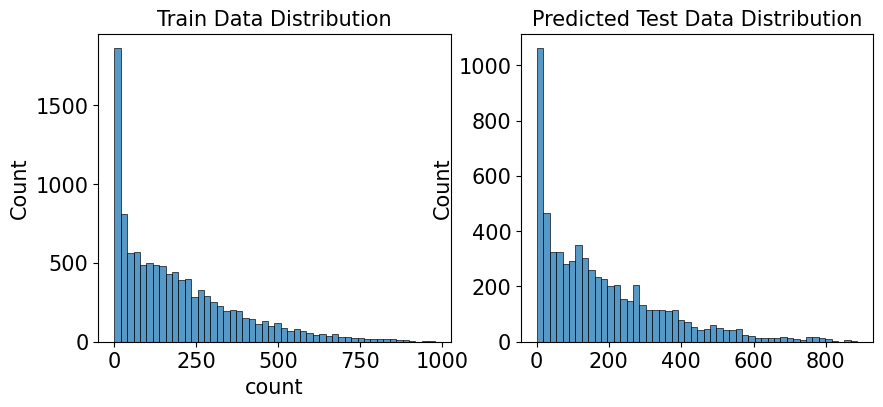

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure,axes = plt.subplots(ncols = 2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title("Train Data Distribution")
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title("Predicted Test Data Distribution")

In [90]:
#  일반적으로 분포도 그릴 떄 활용 범위가 넓은 displot() 을 이용하지만 여기서는 ax 파라미터를 이용하려고 histplot()을 이용함

In [91]:
# 랜덤 포레스트로 예측한 결과를 파일로 저장하고, 커밋 후 제출

submission['count'] = np.exp(randomforest_preds) # 지수 변환
submission.to_csv("submission.csv", index=False)